In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#open the csv file and read the data
df = pd.read_csv("latent_vectors_3.csv", header=None)
data_eng = df.values[100:200]
data_hin = df.values[300:400]
data = np.concatenate((data_eng, data_hin), axis=0)

#save the data to a new csv file
np.savetxt("latent_vectors_India_election_3.csv", data, delimiter=",")
print(data.shape)

(200, 3)


In [13]:
df=pd.read_csv("latent_vectors_India_election_3.csv", header=None)

In [14]:
# K-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

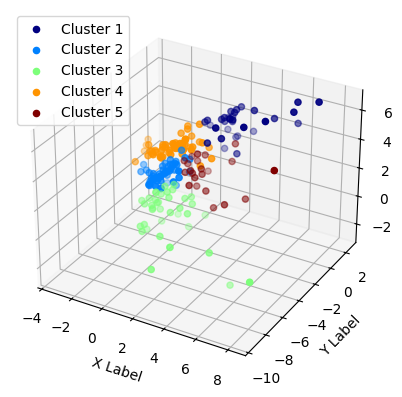

In [15]:
# Visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap
colors = plt.cm.jet(np.linspace(0, 1, num_clusters))

for i in range(num_clusters):
    points = data[labels == i]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=[colors[i]], label=f'Cluster {i+1}')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()

In [16]:
#add labels to the csv file
df['labels'] = labels
df.to_csv("latent_vectors_India_election_3.csv", index=False, header=False)

In [3]:
import json
import pandas as pd

def add_cluster_labels(csv_file, json_file, output_file):
    # Read the CSV file with latent vectors and labels
    df = pd.read_csv(csv_file, header=None, names=['x', 'y', 'z', 'label'])

    # Read the JSON file with articles
    with open(json_file, 'r') as f:
        articles = json.load(f)

    # Add cluster labels to each article
    for i, article in enumerate(articles):
        if i < len(df):
            article['cluster'] = int(df.iloc[i]['label'])

    # Write the updated articles back to the output JSON file
    with open(output_file, 'w') as f:
        json.dump(articles, f, indent=4)


In [4]:
add_cluster_labels("latent_vectors_India_election_3.csv", "Combined_India_election_summary_200.json", "Combined_India_election_summary_200_with_cluster.json")